In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import cv2


In [ ]:
train_dir = "C:/nodejs scripts/Plant"
test_dir = "C:/nodejs scripts/test"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


Found 733 images belonging to 3 classes.
Found 725 images belonging to 2 classes.


In [7]:
import os

print("Train Directory Contents:", os.listdir(train_dir))
print("Test Directory Contents:", os.listdir(test_dir))


Train Directory Contents: ['0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG', '006adb74-934f-448f-a14f-62181742127b___JR_B.Spot 3395.JPG', '00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot 3132.JPG', '01613cd0-d3cd-4e96-945c-a312002037bf___JR_B.Spot 3262.JPG', '0169b9ac-07b9-4be1-8b85-da94481f05a4___NREC_B.Spot 9169.JPG', '018e494e-d2eb-468b-9d02-40219d9f4921___JR_B.Spot 9045.JPG', '01940b6d-7dea-4889-a7b8-a35f4e9bba34___NREC_B.Spot 9120.JPG', '01dfb88b-cd5a-420c-b163-51f5fe07b74d___JR_B.Spot 9091.JPG', '01ebc916-4793-40a3-b5e4-a32687e4fa3d___NREC_B.Spot 9125.JPG', '024623ab-be81-4d99-a653-c3be1495ce8e___JR_B.Spot 8889.JPG', '02baf62e-11e2-4dde-97fb-e369b57d55d3___JR_B.Spot 8971.JPG', '032aa7c4-0a95-4f09-b0bb-1242f4f32d82___NREC_B.Spot 1889.JPG', '03bb7042-3fd5-42e1-aa2c-d51d6843704c___JR_B.Spot 8925.JPG', '0448a226-3d3a-494d-a026-a92b048689c7___JR_B.Spot 8897.JPG', '0495b4d4-66a4-438c-862d-c483f08e4a95___JR_B.Spot 3288.JPG', '04d46cfb-9cc8-4083-82af-ca2bb57c8182___NREC_B.Spo

In [ ]:
model = Sequential()


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)


Epoch 1/20


c:\Users\pasam\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.4446 - loss: -458.9402 - val_accuracy: 0.6786 - val_loss: 2439.4646
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20


c:\Users\pasam\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 764ms/step - accuracy: 0.4479 - loss: -7470.0840 - val_accuracy: 0.6786 - val_loss: 15403.4424
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 787ms/step - accuracy: 0.4307 - loss: -37476.7891 - val_accuracy: 0.6786 - val_loss: 53685.7695
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 808ms/step - accuracy: 0.4440 - loss: -115182.1953 - val_accuracy: 0.6786 - val_loss: 136411.8438
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 826ms/step - accuracy: 0.4206 - loss: -281497.7188 - val_accuracy: 0.6786 - val_loss: 285514.6250
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 820ms/step - accuracy: 0.4694 - loss: -52871

23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - accuracy: 0.6628 - loss: 2996403.0000
Test Loss: 2842024.0
Test Accuracy: 0.6786206960678101


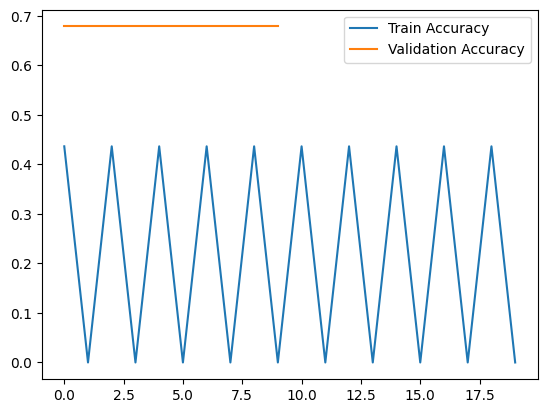

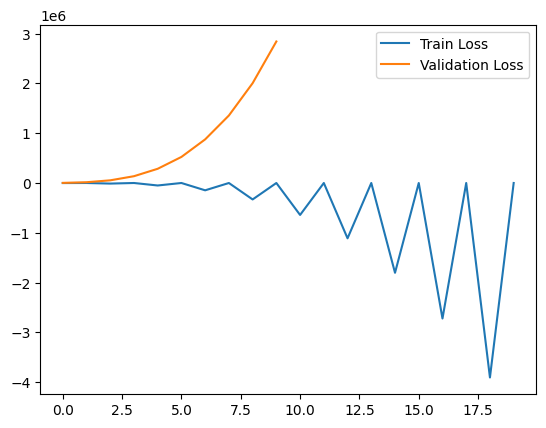

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
def predict_image(image_path):
    import cv2
    import numpy as np


    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image not found at {image_path}")

    image = cv2.resize(image, (128, 128))
    image = np.expand_dims(image, axis=0) / 255.0


    prediction = model.predict(image)
    if prediction[0][0] > 0.5:
        print("The leaf is infected.")
    else:
        print("The leaf is healthy.")


predict_image("C:/nodejs scripts/Plant/new/66dc5b26-4643-4c8b-a95b-d273ead3672b___JR_B.Spot 3191.JPG")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
The leaf is infected.
